In [166]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Посмотрим есть ли пропуски в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#Посмотрим основне статистики данных в датафрейме
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1) Построим модель регрессии на столбцах CRIM, RM, DIS, RAD, LSTAT, чтобы удобней было проводить вручную оптимизацию параметров

In [172]:
x = data[['CRIM', 'RM', 'DIS', 'RAD', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression()

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 )
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.6075294274524525

In [174]:
# Коэффициенты регрессии
print(reg.intercept_)
print(reg.coef_)

3.751855817898054
[-0.12110403  4.95046341 -0.6840836  -0.07290891 -0.67357418]


### 2) Построить дерево решений

In [181]:
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x, y, test_size=0.3, random_state=42 )

In [176]:
list_depth = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
dt_regs = {}
for i in list_depth:
    tree_ = DecisionTreeRegressor(max_depth=i).fit(x_train_tree, y_train_tree)
    print(i, tree_.score(x_test_tree, y_test_tree))

1 0.415876711948333
2 0.6758436094969433
3 0.7728151817263731
4 0.8236292195356916
5 0.8445475849727127
6 0.8252110906586358
7 0.8135881523317127
8 0.8145769313962938
9 0.6961651362011667
10 0.6786557113982716
11 0.7550395665047528
12 0.7624967808735048
13 0.7004705129746707
14 0.6972319815017928
15 0.7621053818562147


In [182]:
# Остановимся на глубине 5, тк там лучше скор
tree_ = DecisionTreeRegressor(max_depth=5)
tree_.fit(x_train_tree, y_train_tree)
tree_.score(x_test_tree, y_test_tree)

0.845723641050903

Визуализируем наше дерево

In [183]:
text_representation = tree.export_text(tree_)
print(text_representation)

|--- feature_1 <= 6.94
|   |--- feature_4 <= 14.40
|   |   |--- feature_2 <= 1.38
|   |   |   |--- feature_0 <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_2 >  1.38
|   |   |   |--- feature_1 <= 6.54
|   |   |   |   |--- feature_4 <= 7.76
|   |   |   |   |   |--- value: [23.78]
|   |   |   |   |--- feature_4 >  7.76
|   |   |   |   |   |--- value: [21.14]
|   |   |   |--- feature_1 >  6.54
|   |   |   |   |--- feature_4 <= 5.78
|   |   |   |   |   |--- value: [30.01]
|   |   |   |   |--- feature_4 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_4 >  14.40
|   |   |--- feature_2 <= 2.08
|   |   |   |--- feature_0 <= 6.83
|   |   |   |   |--- feature_1 <= 5.43
|   |   |   |   |   |--- value: [12.57]
|   |   |   |   |--- feature_1 >  5.43
|   |   |   |   |   |--- value: [15.97]
|   |   |   |--- feature_0 >  6.83
|   |   |   |   |--- feature_4 <= 19.31
|   |   |   |   |   |--- value

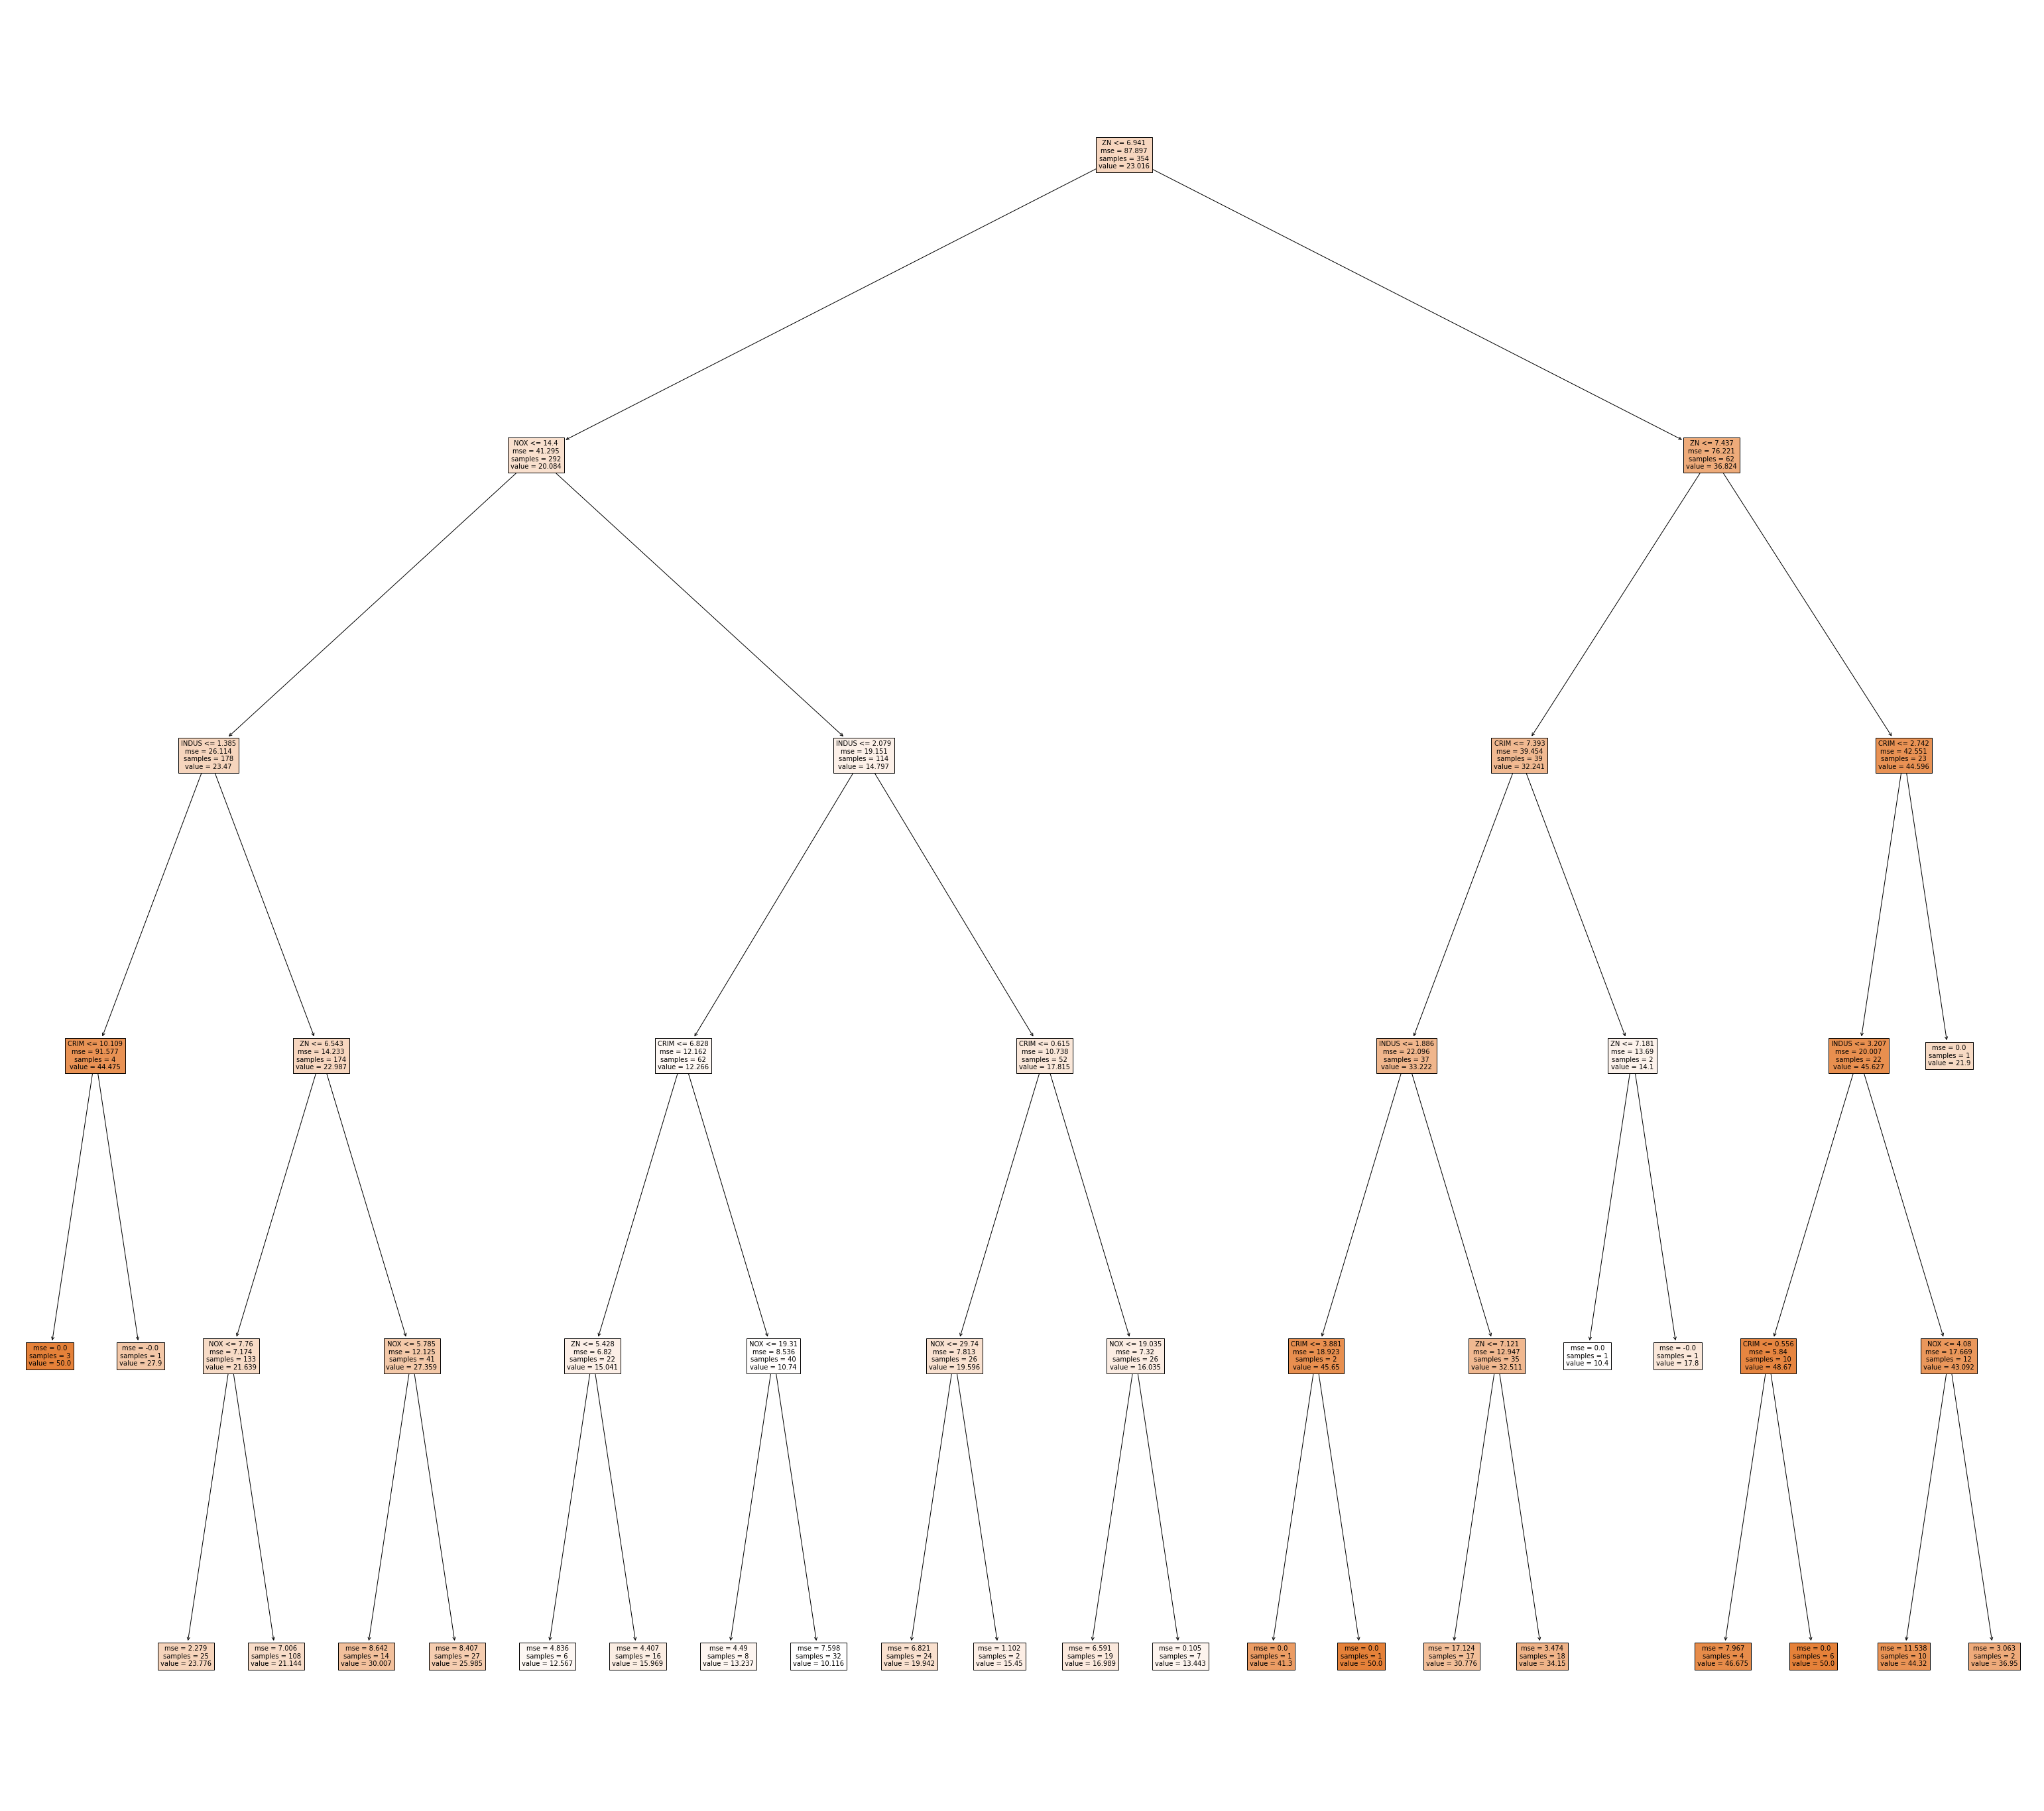

In [184]:
boston = datasets.load_boston()
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(tree_, feature_names=boston.feature_names, fontsize=10, filled=True)

### 3) Оптимизируем параметры линейной регрессии

In [208]:
# Используем градиентный спуск (реализация ручным методом)
EPOCHS = 300
LEARNING_RATE = 0.001

costs = []
params = []
preds = []
params = np.random.normal(size=(6,))

#'CRIM', 'RM', 'DIS', 'RAD', 'LSTAT'

In [209]:
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * x_train['CRIM'] + params[2] * x_train['RM'] + params[3] * x_train['DIS'] + params[4] * x_train['RAD'] + params[5] * x_train['LSTAT']
    preds.append(predictions)

    cost = np.sum(np.square(predictions - y_train)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - y_train) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - y_train) * x_train['CRIM']) / len(predictions)
    params[2] -= LEARNING_RATE * np.sum((predictions - y_train) * x_train['RM']) / len(predictions)
    params[3] -= LEARNING_RATE * np.sum((predictions - y_train) * x_train['DIS']) / len(predictions)
    params[4] -= LEARNING_RATE * np.sum((predictions - y_train) * x_train['RAD']) / len(predictions)
    params[5] -= LEARNING_RATE * np.sum((predictions - y_train) * x_train['LSTAT']) / len(predictions)

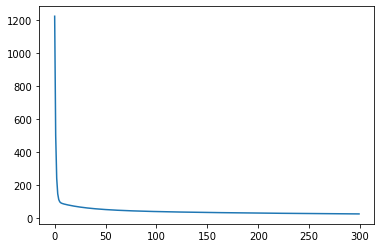

In [210]:
plt.plot(costs)

In [211]:
params

array([-1.83150639, -0.14131811,  3.44734493,  1.73229052,  0.16802004,
       -0.41182685])

In [212]:
# Посмотрим на предсказания нашей модели с новыми параметров после оптимизации
y_pred = params[0] + params[1] * x_test['CRIM'] + params[2] * x_test['RM'] + params[3] * x_test['DIS'] + params[4] * x_test['RAD'] + params[5] * x_test['LSTAT']

In [213]:
r2_score(y_test, y_pred)

0.4168491140472963

In [214]:
mean_squared_error(y_test, y_pred)

43.45237769548014

Дерево решений показало лучший скор, чем линейная регрессия. Возможно для данной задачи лучше использовать дерево решений